In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/wine_data.csv")

In [5]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/wine_data.csv",usecols=[0,1,2],header=None)

In [7]:
df.columns=["class label",'Alcohol','Malic acid']
df

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

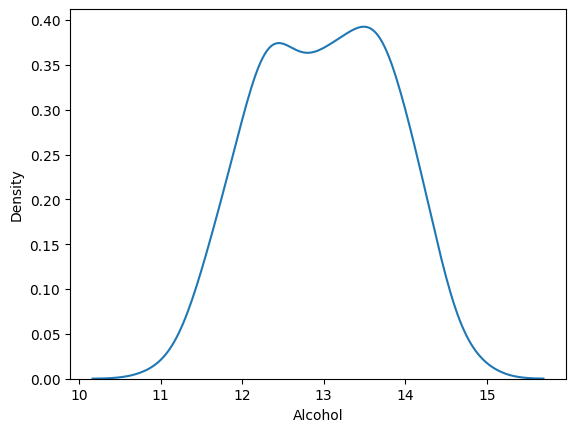

In [8]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

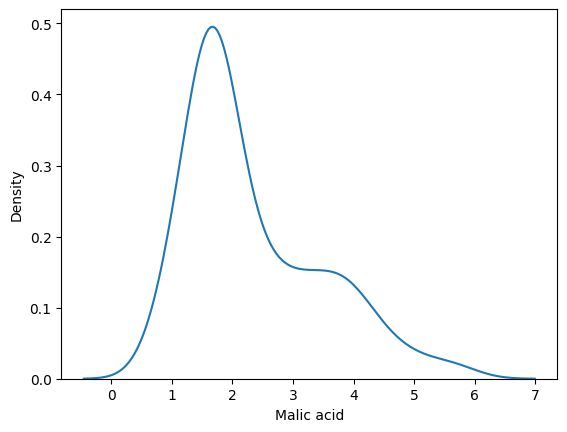

In [9]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

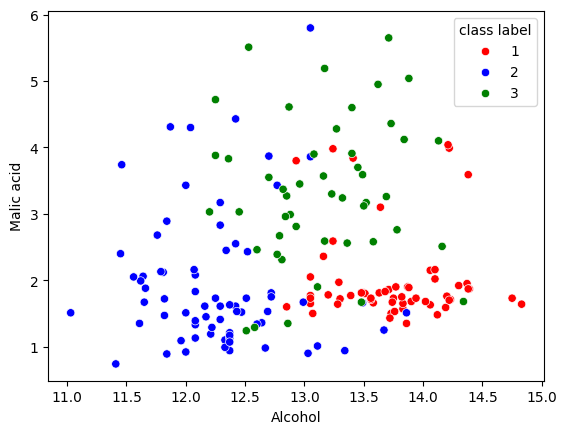

In [10]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df["Alcohol"],y=df["Malic acid"],hue=df["class label"],palette=color_dict)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("class label",axis=1),df["class label"],test_size=0.3,random_state=0)

In [12]:
X_train.shape,X_test.shape,y_train.shape

((124, 2), (54, 2), (124,))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [14]:
X_train_Scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [15]:
X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [16]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [17]:
np.round(X_train_Scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


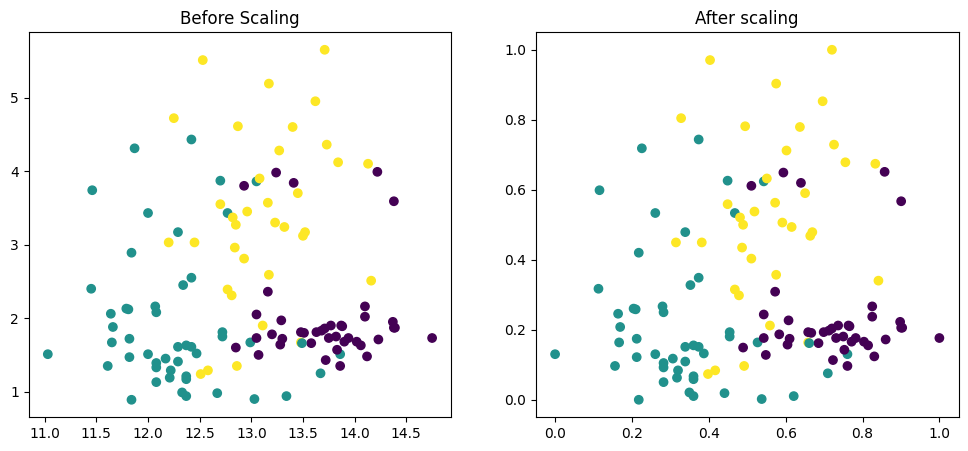

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Alcohol"],X_train["Malic acid"],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled["Alcohol"],X_train_Scaled["Malic acid"],c=y_train)
ax2.set_title("After scaling")
plt.show()

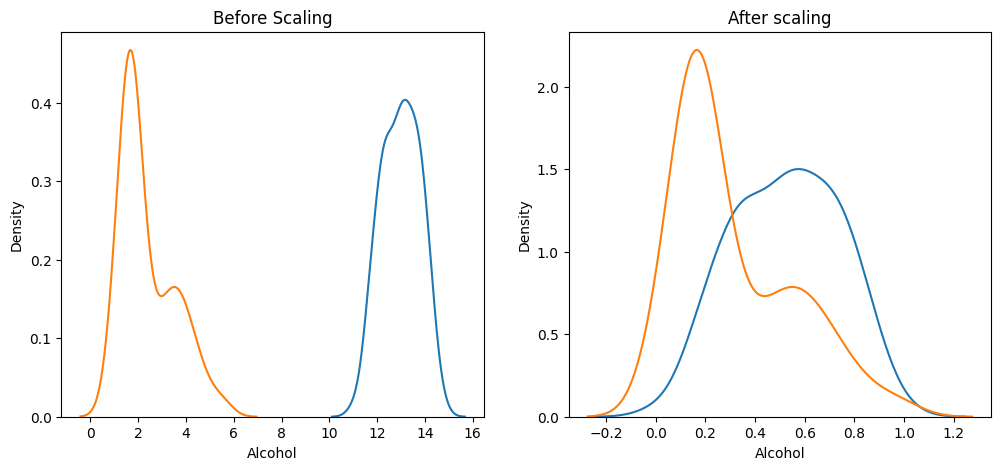

In [19]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic acid"],ax=ax1)
ax1.set_title("Before Scaling")
sns.kdeplot(X_train_Scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_Scaled["Malic acid"],ax=ax2)
ax2.set_title("After scaling")
plt.show()

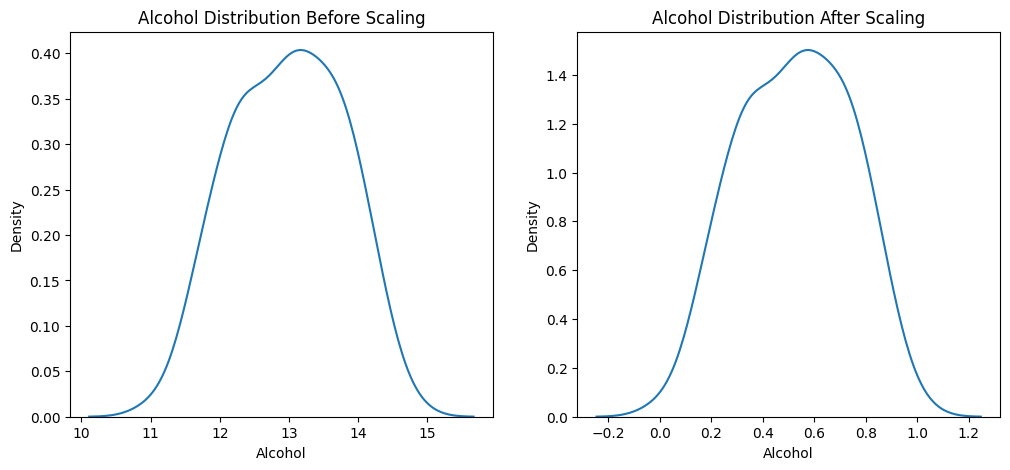

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train["Alcohol"],ax=ax1)

ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(X_train_Scaled["Alcohol"],ax=ax2)
plt.show()

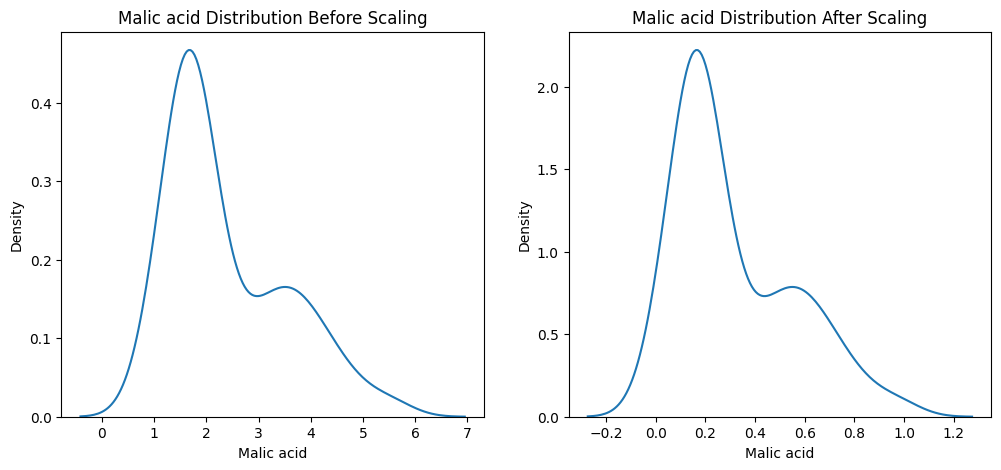

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Malic acid Distribution Before Scaling")
sns.kdeplot(X_train["Malic acid"],ax=ax1)

ax2.set_title("Malic acid Distribution After Scaling")
sns.kdeplot(X_train_Scaled["Malic acid"],ax=ax2)
plt.show()